In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

2023-02-12 23:40:36.261601: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-12 23:40:36.993117: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/prp/anaconda3/lib/
2023-02-12 23:40:36.993212: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/prp/anaconda3/lib/
2023-02-12 23:40:36.993219: W tensorflow/compiler/tf2tensorrt/utils/py_utils.c

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
de_credit, info = tfds.load('german_credit_numeric', split='train', with_info=True)
de_credit_df = tfds.as_dataframe(de_credit)

de_credit_df.head()

,features,label
0,"[3, 6, 4, 13, 2, 5, 1, 4, 3, 28, 3, 2, 2, 2, 1...",1
1,"[4, 4, 2, 6, 1, 2, 2, 3, 1, 23, 3, 1, 2, 1, 1,...",1
2,"[4, 24, 4, 20, 1, 3, 2, 4, 3, 37, 3, 1, 1, 2, ...",1
3,"[4, 18, 2, 11, 5, 2, 2, 2, 1, 21, 3, 1, 1, 2, ...",1
4,"[4, 6, 2, 13, 3, 3, 1, 4, 1, 62, 3, 1, 1, 1, 1...",1


In [15]:
df = de_credit_df.features.apply(pd.Series)
df.columns = [f"f_{i}" for i in range(df.shape[1])]

df_data = pd.concat([df, de_credit_df.label], axis=1)

print(df_data.shape)
df_data.head()

(1000, 25)


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,label
0,3,6,4,13,2,5,1,4,3,28,...,1,0,1,0,0,1,0,0,1,1
1,4,4,2,6,1,2,2,3,1,23,...,0,0,1,0,1,0,0,1,0,1
2,4,24,4,20,1,3,2,4,3,37,...,1,0,1,0,0,1,0,0,1,1
3,4,18,2,11,5,2,2,2,1,21,...,0,0,1,0,1,0,0,0,1,1
4,4,6,2,13,3,3,1,4,1,62,...,0,0,1,0,0,1,0,0,1,1


In [16]:
info

tfds.core.DatasetInfo(
    name='german_credit_numeric',
    full_name='german_credit_numeric/1.0.0',
    description="""
    This dataset classifies people described by a set of attributes as good or bad
    credit risks. The version here is the "numeric" variant where categorical and
    ordered categorical attributes have been encoded as indicator and integer
    quantities respectively.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)',
    data_path='/home/prp/tensorflow_datasets/german_credit_numeric/1.0.0',
    file_format=tfrecord,
    download_size=99.61 KiB,
    dataset_size=58.61 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(24,), dtype=int32),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('features', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=1000, num_shards=1>,
    },
    citation="""@misc{Dua:2019 ,
    author

In [17]:
from sklearn.model_selection import train_test_split

In [40]:
labels = df_data['label']
labels.value_counts()

1    700
0    300
Name: label, dtype: int64

In [41]:
data = df_data.drop('label', axis=1)

In [42]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=42, test_size=0.2)

In [43]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((800, 24), (200, 24), (800,), (200,))

In [44]:
train_data

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23
29,1,30,0,46,1,3,1,2,1,32,...,1,0,0,0,0,0,1,0,0,1
535,1,24,2,42,1,3,3,4,2,28,...,1,0,0,1,0,0,1,0,0,1
695,1,16,4,26,1,5,3,4,2,43,...,1,1,0,0,0,1,0,0,0,1
557,4,6,2,5,1,3,2,1,1,29,...,1,0,0,1,0,0,1,0,0,1
836,4,10,4,12,1,5,3,4,1,32,...,2,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,4,5,2,34,1,4,3,4,1,74,...,1,0,0,1,0,0,1,0,1,0
270,1,11,4,39,1,3,3,2,1,36,...,1,1,0,1,0,1,0,0,0,1
860,4,9,2,14,1,4,2,2,3,27,...,1,0,0,1,0,0,1,0,0,1
435,1,60,3,68,1,5,3,4,4,63,...,1,0,0,1,0,0,1,0,0,1


In [45]:
def return_callbacks(model_name):
  callbacks_list = []
  callbacks_list.append(tf.keras.callbacks.ModelCheckpoint("saved_models/"+model_name, monitor='val_loss', save_best_only='True', verbose=1))
  callbacks_list.append(tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights='True'))
  return callbacks_list  

In [47]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
], name='basic_model_0')

model_0.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_0 = model_0.fit(train_data, train_labels, epochs=100, validation_data = (test_data, test_labels), callbacks=return_callbacks(model_0.name))

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 0.7336 - accuracy: 0.6538
Epoch 1: val_loss improved from inf to 0.59318, saving model to saved_models/basic_model_0
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Assets written to: saved_models/basic_model_0/assets


INFO:tensorflow:Assets written to: saved_models/basic_model_0/assets


25/25 [==============================] - 1s 30ms/step - loss: 0.7336 - accuracy: 0.6538 - val_loss: 0.5932 - val_accuracy: 0.7150
Epoch 2/100
25/25 [==============================] - ETA: 0s - loss: 0.5557 - accuracy: 0.7262
Epoch 2: val_loss improved from 0.59318 to 0.55316, saving model to saved_models/basic_model_0
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Assets written to: saved_models/basic_model_0/assets


INFO:tensorflow:Assets written to: saved_models/basic_model_0/assets


25/25 [==============================] - 1s 21ms/step - loss: 0.5557 - accuracy: 0.7262 - val_loss: 0.5532 - val_accuracy: 0.7300
Epoch 3/100
14/25 [===============>..............] - ETA: 0s - loss: 0.5424 - accuracy: 0.7433
Epoch 3: val_loss improved from 0.55316 to 0.54225, saving model to saved_models/basic_model_0
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Assets written to: saved_models/basic_model_0/assets


INFO:tensorflow:Assets written to: saved_models/basic_model_0/assets


25/25 [==============================] - 1s 21ms/step - loss: 0.5474 - accuracy: 0.7250 - val_loss: 0.5422 - val_accuracy: 0.7500
Epoch 4/100
15/25 [=================>............] - ETA: 0s - loss: 0.5175 - accuracy: 0.7458
Epoch 4: val_loss improved from 0.54225 to 0.53639, saving model to saved_models/basic_model_0
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Assets written to: saved_models/basic_model_0/assets


INFO:tensorflow:Assets written to: saved_models/basic_model_0/assets


25/25 [==============================] - 1s 21ms/step - loss: 0.5015 - accuracy: 0.7513 - val_loss: 0.5364 - val_accuracy: 0.7550
Epoch 5/100
13/25 [==============>...............] - ETA: 0s - loss: 0.4966 - accuracy: 0.7572
Epoch 5: val_loss improved from 0.53639 to 0.52377, saving model to saved_models/basic_model_0
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Assets written to: saved_models/basic_model_0/assets


INFO:tensorflow:Assets written to: saved_models/basic_model_0/assets


25/25 [==============================] - 1s 21ms/step - loss: 0.4850 - accuracy: 0.7638 - val_loss: 0.5238 - val_accuracy: 0.7350
Epoch 6/100
22/25 [=========================>....] - ETA: 0s - loss: 0.4820 - accuracy: 0.7741
Epoch 6: val_loss did not improve from 0.52377
25/25 [==============================] - 0s 7ms/step - loss: 0.4835 - accuracy: 0.7713 - val_loss: 0.5500 - val_accuracy: 0.7600
Epoch 7/100
13/25 [==============>...............] - ETA: 0s - loss: 0.4885 - accuracy: 0.7740
Epoch 7: val_loss improved from 0.52377 to 0.50650, saving model to saved_models/basic_model_0
INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(24, 128), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c052970>, 140439458448288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c063eb0>, 140439458448368), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(128, 64), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba9c076e20>, 140439458450208), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641cbe50>, 140439458450288), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(64, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641e0d30>, 140439458501376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fba641f4d00>, 140439458501456), {}).


INFO:tensorflow:Assets written to: saved_models/basic_model_0/assets


INFO:tensorflow:Assets written to: saved_models/basic_model_0/assets


25/25 [==============================] - 1s 21ms/step - loss: 0.4747 - accuracy: 0.7775 - val_loss: 0.5065 - val_accuracy: 0.7750
Epoch 8/100
24/25 [===========================>..] - ETA: 0s - loss: 0.4814 - accuracy: 0.7656
Epoch 8: val_loss did not improve from 0.50650
25/25 [==============================] - 0s 7ms/step - loss: 0.4765 - accuracy: 0.7675 - val_loss: 0.5770 - val_accuracy: 0.7350
Epoch 9/100
18/25 [====================>.........] - ETA: 0s - loss: 0.4716 - accuracy: 0.7795
Epoch 9: val_loss did not improve from 0.50650
25/25 [==============================] - 0s 5ms/step - loss: 0.4908 - accuracy: 0.7688 - val_loss: 0.5555 - val_accuracy: 0.7650
Epoch 10/100
18/25 [====================>.........] - ETA: 0s - loss: 0.4880 - accuracy: 0.7778
Epoch 10: val_loss did not improve from 0.50650
25/25 [==============================] - 0s 5ms/step - loss: 0.4829 - accuracy: 0.7812 - val_loss: 0.5320 - val_accuracy: 0.7500
Epoch 11/100
16/25 [==================>...........] - E

In [48]:
model_0 = tf.keras.models.load_model(f"saved_models/{model_0.name}")

In [49]:
model_0.evaluate(test_data, test_labels)

7/7 [==============================] - 0s 5ms/step - loss: 0.5065 - accuracy: 0.7750


[0.5065014958381653, 0.7749999761581421]

In [50]:
def plot(history):
    fig, axs = plt.subplots(1,2, figsize=(12, 5))

    hist = history.history

    for ax, metric in zip(axs, ["loss", "accuracy"]):
        ax.plot(hist[metric])
        ax.plot(hist["val_"+metric])
        ax.legend([metric, "val_" + metric])
        ax.set_title(metric)

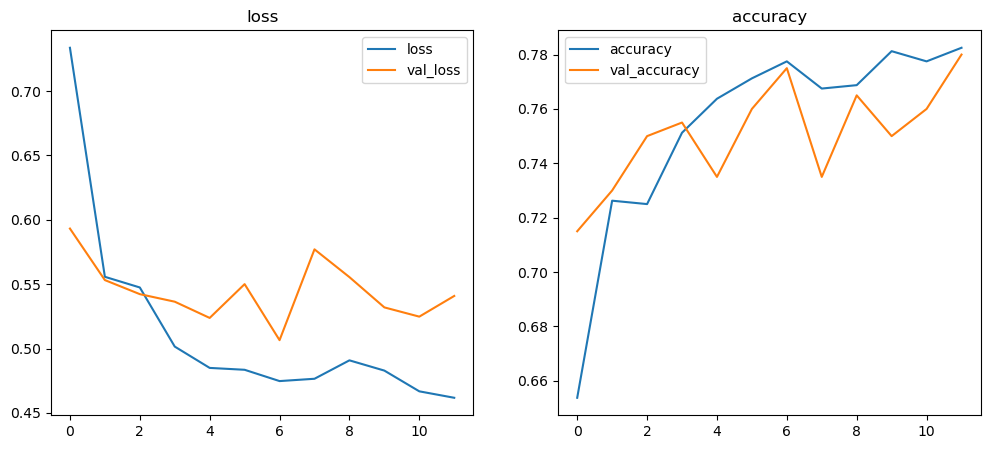

In [51]:
plot(history_0)